In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df_org = pd.read_csv("../amz_uk_price_prediction_dataset.csv")
df = df_org.copy()




df.head(10)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
5,6,B09B97WSLF,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
6,7,B09B9615X2,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
7,8,B01MTB55WH,Anker Soundcore 2 Portable Bluetooth Speaker w...,4.7,103673,39.99,False,0,Hi-Fi Speakers
8,9,B016MO90GW,"Bluetooth Speaker, Anker Soundcore Speaker Upg...",4.7,29909,29.99,False,0,Hi-Fi Speakers
9,10,B09ZQF5GZW,RIENOK Bluetooth Speaker Portable Wireless Blu...,4.5,16014,29.99,False,0,Hi-Fi Speakers


In [3]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [4]:
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('bool'), dtype('float64'), dtype('int64')]

In [5]:
df.select_dtypes("number").columns

Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')

In [6]:
df.select_dtypes("number").nunique().sort_values(ascending = False)

uid                  2443651
price                  82916
reviews                19446
stars                     42
boughtInLastMonth         25
dtype: int64

In [7]:
df_numerical = df.select_dtypes("number")
df_numerical

,uid,stars,reviews,price,boughtInLastMonth
0,1,4.7,15308,21.99,0
1,2,4.7,98099,23.99,0
2,3,4.7,15308,21.99,0
3,4,4.7,7205,31.99,0
4,5,4.6,1881,17.99,0
...,...,...,...,...,...
2443646,2828589,0.0,0,22.34,0
2443647,2828590,0.0,0,97.99,0
2443648,2828591,0.0,0,52.99,0
2443649,2828592,4.3,404,79.99,0


In [8]:
df_categorical = df.select_dtypes("object")
df_categorical

df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [9]:
df_categorical.drop("title", inplace = True, axis = 1)
df_categorical

,asin,category
0,B09B96TG33,Hi-Fi Speakers
1,B01HTH3C8S,Hi-Fi Speakers
2,B09B8YWXDF,Hi-Fi Speakers
3,B09B8T5VGV,Hi-Fi Speakers
4,B09WX6QD65,Hi-Fi Speakers
...,...,...
2443646,B0CHSD7P2Q,Motorbike Clothing
2443647,B0B7B8FNBQ,Motorbike Clothing
2443648,B0BD5FL5FB,Motorbike Clothing
2443649,B008OYLL4I,Motorbike Clothing


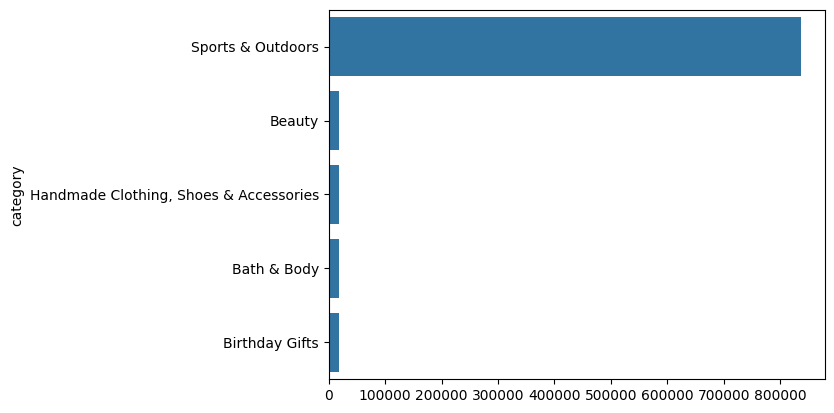

In [10]:
#Part 1: Understanding Product Categories
#Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?
#Frequency Tables:
#Generate a frequency table for the product category.
#Which are the top 5 most listed product categories?

cat_count = df_categorical["category"].value_counts().sort_values(ascending = False)
cat_count = cat_count.head(5)

#Visualizations:
#Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
#For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

sns.barplot(y=cat_count.index, x=cat_count.values)
plt.show()

## HOW TO IMPROVE READABILITY -------------------------
## HOW TO UPDATE VERSION TO REMOVE PLT.SHOW() -----------------

In [11]:
cat_count.index

Index(['Sports & Outdoors', 'Beauty', 'Handmade Clothing, Shoes & Accessories',
       'Bath & Body', 'Birthday Gifts'],
      dtype='object', name='category')

In [12]:
print(np.__version__)
print(sns.__version__)

2.1.3
0.13.2


price
9.99     48922
12.99    38823
8.99     34058
7.99     33632
14.99    32570
6.99     31948
5.99     27818
19.99    27436
11.99    25488
10.99    25172
Name: count, dtype: int64

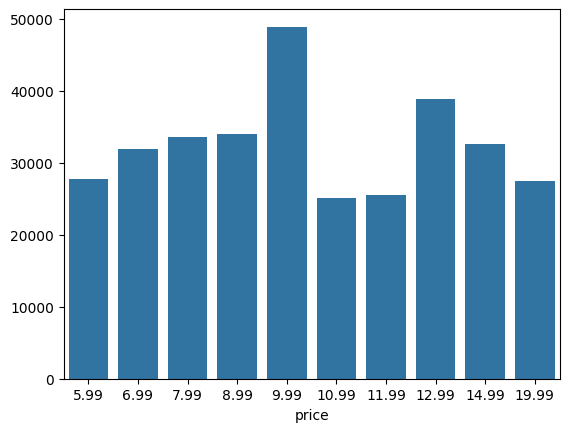

In [13]:
#Part 2: Delving into Product Pricing
#Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

price_count = df["price"].value_counts().sort_values(ascending = False)
price_count = price_count.head(10)

sns.barplot(y=price_count.values, x=price_count.index)


## HOW TO ORDER BY DESCENDING BARS ------------------
price_count

89.24
19.09
9.99


<Axes: xlabel='price'>

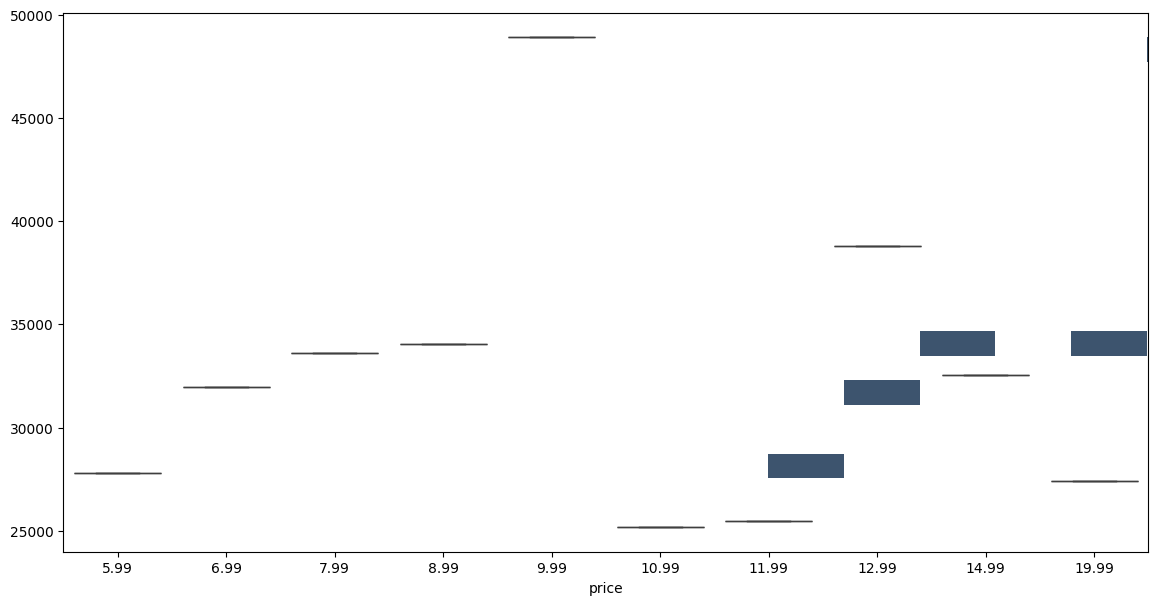

In [14]:
#Measures of Centrality:
#Calculate the mean, median, and mode for the price of products.
#+What's the average price point of products listed? How does this compare with the most common price point (mode)?
mean_price = df_numerical["price"].mean().round(2)
median_price = df_numerical["price"].median()
mode_price = df_numerical["price"].mode()[0]

print(mean_price)
print(median_price)
print(mode_price)




#Measures of Dispersion:
#Determine the variance, standard deviation, range, and interquartile range for product price.
#How varied are the product prices? Are there any indicators of a significant spread in prices?
df_numerical.price.describe()



#Visualizations:
#Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
#Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

plt.figure(figsize=(14,7))
sns.histplot(y=price_count.values, x=price_count.index, bins=20)
sns.boxplot(y=price_count.values, x=price_count.index)


In [15]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [ ]:
#Part 3: Unpacking Product Ratings
#Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?
#Measures of Centrality:
#Calculate the mean, median, and mode for the rating of products.
#How do customers generally rate products? Is there a common trend?


star_mean = df[df["stars"] != 0.0].mean()
star_mode = df[df["stars"] != 0.0].mode()[0]
star_median = df[df["stars"] != 0.0].median()

print(f"{star_mean: .2f}, {star_median: .2f}, {star_mode: .2f}")

#Measures of Dispersion:
#Determine the variance, standard deviation, and interquartile range for product rating.
#Are the ratings consistent, or is there a wide variation in customer feedback?

var = df[df["stars"] != 0.0].var()
std = df[df["stars"] != 0.0].std()

q1 = df[df["stars"] != 0.0].quantile(.25)
q3 = df[df["stars"] != 0.0].quantile(.75)
IQR = q3 - q1

print(f"{var: .2f}, {std: .02f}, {IQR}")

#Shape of the Distribution:
#Calculate the skewness and kurtosis for the rating column.
#Are the ratings normally distributed, or do they lean towards higher or lower values?

skew = df[df["stars"] != 0.0].skew().round(2)
kurt = df[df["stars"] != 0.0].kurt().round(2)

print(f"{skew}, {kurt}")

#Visualizations:
#Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?
